In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("Rent Data.xlsx")

In [3]:
df

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [4]:
df.head

<bound method NDFrame.head of     area   rent
0   2000  31500
1   2100  35000
2   2500  41050
3   2250  36100
4   3000  52100
5   1900  32500
6   1500  20000
7   1850  24500
8   2700  48000
9   2100  31000
10  2150  34500
11  2100  32000
12  2100  34500
13  2510  40050
14  2250  34100
15  3100  51500
16  1800  30500
17  1550  21000
18  1800  25000
19  2700  47000
20  2110  31500
21  2100  33500
22  3500  70000
23  1200  20000
24  2800  50000
25  3100  53000
26  2750  48000
27  1800  25000
28  2200  31460>

In [5]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [6]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt

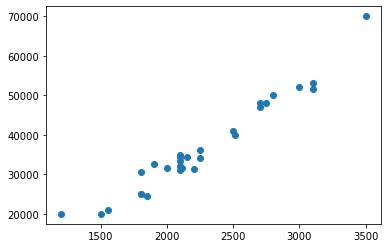

In [8]:
plt.scatter(df['area'],df['rent'])

In [9]:
df.area.mean()

2259.310344827586

In [10]:
df.rent.mean()

36702.06896551724

Text(0.5, 0, 'Area')

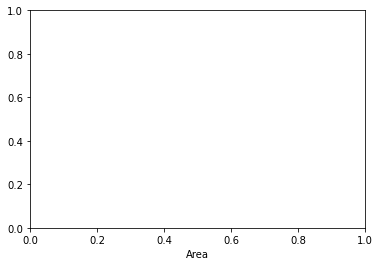

In [11]:
plt.xlabel("Area")

Text(0.5, 1.0, 'Area/Rent')

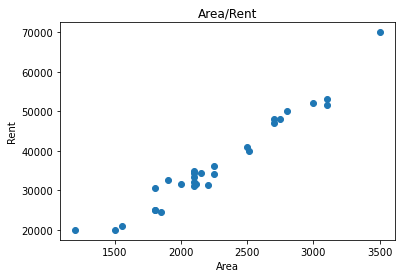

In [12]:
plt.scatter(df['area'],df['rent'])
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Area/Rent")

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('rent',axis=1)

In [15]:
X


,area
0,2000
1,2100
2,2500
3,2250
4,3000
5,1900
6,1500
7,1850
8,2700
9,2100


In [16]:
y=df['rent']

In [17]:
y


0     31500
1     35000
2     41050
3     36100
4     52100
5     32500
6     20000
7     24500
8     48000
9     31000
10    34500
11    32000
12    34500
13    40050
14    34100
15    51500
16    30500
17    21000
18    25000
19    47000
20    31500
21    33500
22    70000
23    20000
24    50000
25    53000
26    48000
27    25000
28    31460
Name: rent, dtype: int64

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [19]:
y_test

21    33500
3     36100
24    50000
0     31500
6     20000
2     41050
18    25000
5     32500
25    53000
Name: rent, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr

LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
X_train

,area
7,1850
14,2250
19,2700
12,2100
27,1800
23,1200
10,2150
22,3500
1,2100
9,2100


In [26]:
lr.intercept_

-12360.016816792122

In [27]:
lr.coef_


array([21.7009071])

In [29]:
lr.predict([[3000]])

array([52742.70446931])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse=mean_squared_error(y_test,lr.predict(X_test))

In [32]:
mse

2604932.367897777

In [35]:
lr.predict(X)

array([31041.79737394, 33211.88808348, 41892.25092162, 36467.02414778,
       52742.70446931, 28871.7066644 , 20191.34382626, 27786.66130964,
       46232.4323407 , 33211.88808348, 34296.93343825, 33211.88808348,
       33211.88808348, 42109.25999258, 36467.02414778, 54912.79517884,
       26701.61595487, 21276.38918103, 26701.61595487, 46232.4323407 ,
       33428.89715443, 33211.88808348, 63593.15801699, 13681.07169765,
       48402.52305023, 54912.79517884, 47317.47769547, 26701.61595487,
       35381.97879301])

Text(0.5, 1.0, 'Area/Rent')

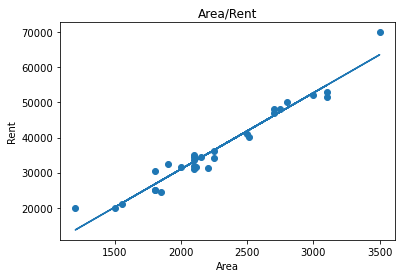

In [37]:
plt.plot(df['area'],lr.predict(X))
plt.scatter(df['area'],df['rent'])
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Area/Rent")

In [38]:
import pickle as pk

In [39]:
pk.dump(lr,open('Area_rent_pickle','wb'))

In [42]:
model=pk.load(open('Area_rent_pickle',"rb"))

In [44]:
model.predict([[3000]])

array([52742.70446931])